# Pupil diameter
- Preprocess noisy pupil diameter signal
- Apply subtractive baseline correction

In [1]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the csv file containing eye tracker data into a Pandas DataFrame
data = pd.read_csv("sample_eye_tracking_data.csv")

# Display the first 5 rows (from index 10_000 onwards, for a display sample)
data[10_000:].head()

C:\Users\Deepshik\AppData\Local\Temp\ipykernel_10864\3312682630.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("sample_eye_tracking_data.csv")


,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,...,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_validity,stim_present,stim_cat,stim_id,remarks,seconds
10000,641084409,4303640566118,"(0.5161799788475037, 0.42415767908096313)","(8.543044090270996, 171.51742553710938, 62.427...",1,2.022293,1,"(-24.427112579345703, -50.60432434082031, 662....",1,"(0.5196371078491211, 0.4163331985473633)",...,1,2.273132,1,"(41.3125114440918, -50.29133224487305, 660.508...",1,True,positive,Landscapes_142_h.jpg,NaN,641.084409
10001,641085243,4303640566952,"(0.5167351961135864, 0.4226061701774597)","(8.83620548248291, 171.95045471191406, 62.5847...",1,2.026871,1,"(-24.425159454345703, -50.601985931396484, 662...",1,"(0.518481433391571, 0.4141293168067932)",...,1,2.277786,1,"(41.30992889404297, -50.29154968261719, 660.48...",1,True,positive,Landscapes_142_h.jpg,NaN,641.085243
10002,641086077,4303640567786,"(0.51610267162323, 0.42299050092697144)","(8.502237319946289, 171.84320068359375, 62.545...",1,2.030792,1,"(-24.427412033081055, -50.60201644897461, 662....",1,"(0.5182624459266663, 0.4123406410217285)",...,1,2.262253,1,"(41.3126335144043, -50.286399841308594, 660.50...",1,True,positive,Landscapes_142_h.jpg,NaN,641.086077
10003,641086911,4303640568620,"(0.5187034010887146, 0.42432698607444763)","(9.875415802001953, 171.47018432617188, 62.409...",1,2.018906,1,"(-24.430147171020508, -50.602115631103516, 662...",1,"(0.5180981159210205, 0.4153512120246887)",...,1,2.267181,1,"(41.309783935546875, -50.283485412597656, 660....",1,True,positive,Landscapes_142_h.jpg,NaN,641.086911
10004,641087742,4303640569451,"(0.5180153846740723, 0.4274247884750366)","(9.512117385864258, 170.60565185546875, 62.095...",1,2.023651,1,"(-24.4301815032959, -50.6031608581543, 662.069...",1,"(0.5187749862670898, 0.41708478331565857)",...,1,2.272079,1,"(41.30982971191406, -50.2877197265625, 660.484...",1,True,positive,Landscapes_142_h.jpg,NaN,641.087742


## Visualizing the pupil diameter signal
Visually inspecting the pupil diameter signal to check for noise and artifacts is an important part of pupillometry preprocessing ([Mathôt et al., 2018]).

[Mathôt et al., 2018]: https://doi.org/10.3758/s13428-017-1007-2

Since we will be plotting the pupil diameter many times for visual inspection, and also to check if the preprocessing pipelines have managed to successfully clean the data, it makes sense to create a function for this visualization.

Below, we will create a simple function that encapsulates the plotting script, for ease of use within this notebook.

In [3]:
def plot_pupil_dia(df):
    """
    Plots the diameter and validity of the left pupil throughout the recording session.

    Args:
        - df (pd.DataFrame): The dataframe containing eye-tracking data.
    """
    
    plt.figure(figsize=(15, 5))
    plt.plot(df.left_pupil_diameter, label='Left pupil diameter', color='k') # plot the left pupil diameter signal
    plt.plot(df.left_pupil_validity, label='Left pupil validity') # plot the validty (either 0 or 1) of left pupil
    plt.title('Left pupil diameter throughout the experiment session')
    plt.legend()
    plt.tight_layout()
    plt.show()

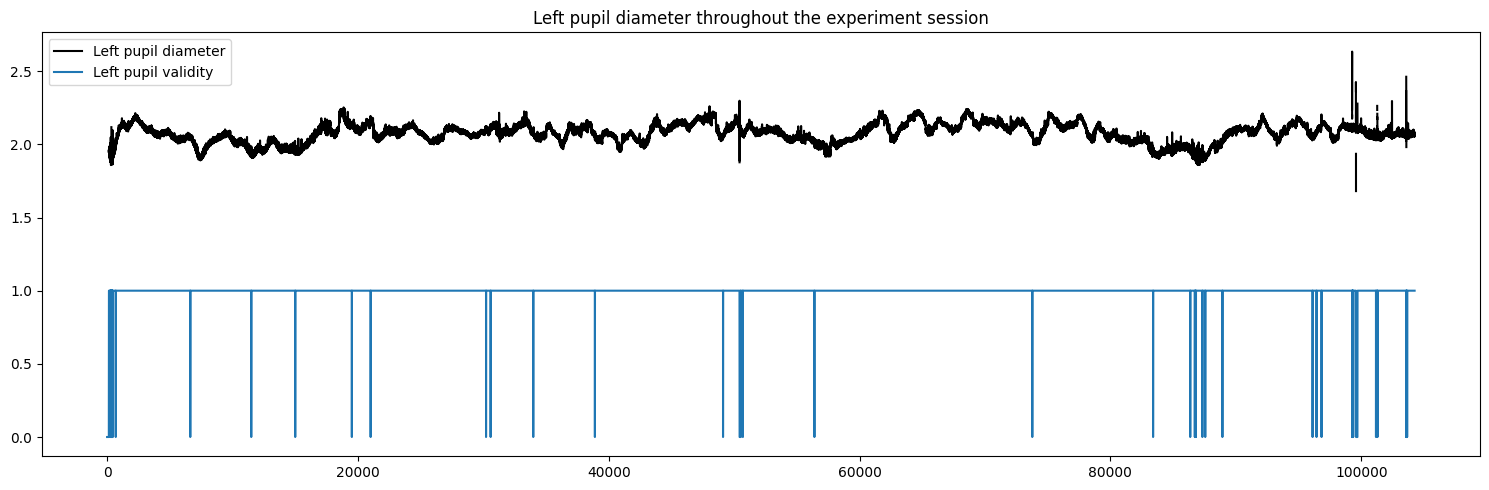

In [4]:
# Usage
plot_pupil_dia(data)

A study-specific visualization that is able to convey the various segments of a recording session can also be helpful.

My study-specific viz function, `overview_plot` can be found in `experiment_specific_utils.common`. <br>
This function applies a color to the different segments of my recording: fixation cross segment, scrambled image segment, and stimulus image segment.

Help on function overview_plot in module experiment_specific_utils.common:

overview_plot(dataframe, pupil_to_plot='left', plot_validity=True, baseline_corrected=False)
    Plot the pupil diameter across the entire experiment session, with scrambled, stimulus, and fixation segments highlighted.
    
    Args:
        - dataframe (pd.DataFrame):         The dataframe containing eye-tracking data.
        - pupil_to_plot (str, optional):    Which pupil diameter to plot. Defaults to "left".
        - plot_validity (bool, optional):   Whether to plot pupil detection validity. Defaults to True.
        - baseline_corrected (bool, optional):  Whether to plot baseline corrected pupil diameter
                                                (requires input df to contain baseline corrected columns). Defaults to False.



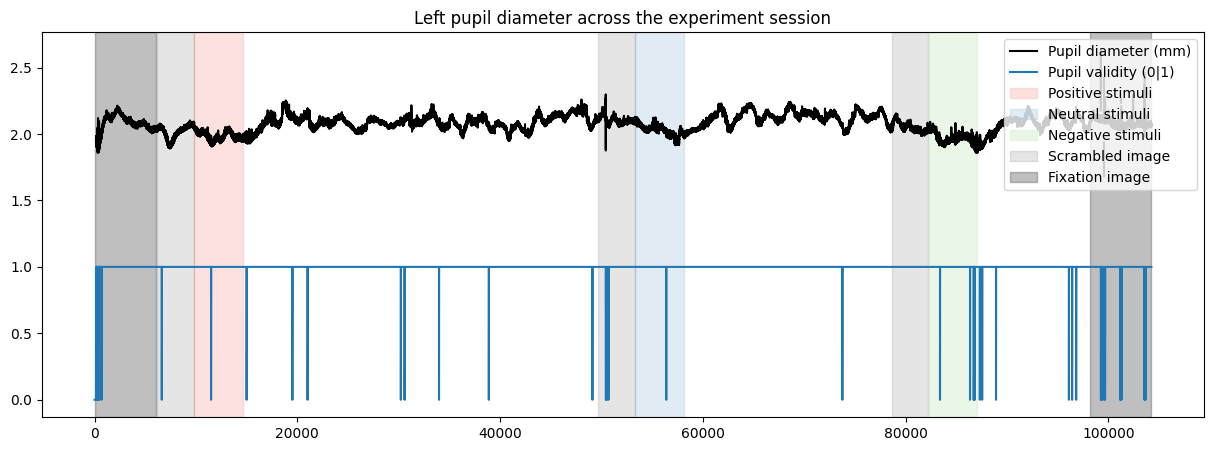

In [5]:
from experiment_specific_utils.common import overview_plot
help(overview_plot)

overview_plot(data)

# Preprocessing the pupil diameter signal

## Removal of invalid data
Use the function `remove_invalids` from `extract_eye_features.utils` to drop all rows that do not contain pupil diameter data (likely due to blinks), and noisy data that surrounds a blink.

In [6]:
# Import the function and print docstring
from extract_eye_features.utils import remove_invalids
help(remove_invalids)

Help on function remove_invalids in module extract_eye_features.utils:

remove_invalids(dataframe, threshold=1, pad_before=150, pad_after=150, verbose=True)
    Removes continuous sequences of data where the pupil is invalid for atleast `threshold` number of samples;
    as well as the data before and after that sequence (size defined by `padding`).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger removal. Defaults to 1 (aggressive removal).
        - pad_before (int, optional):  Number of rows to remove before each invalid segment. Defaults to 150 (aggressive artifact padding).
        - pad_after (int, optional):   Number of rows to remove after each invalid segment. Defaults to 150 (aggressive artifact padding).
        - verbose (bool, optional):    Print details on how much data has been removed. Defaults to True.
    
    Returns:
        - 

In [7]:
# Usage
data_invalids_removed = remove_invalids(data)

input dataframe size: 104255
ouput dataframe size: 87734
number of segments removed: 132
total number of rows removed: 16521


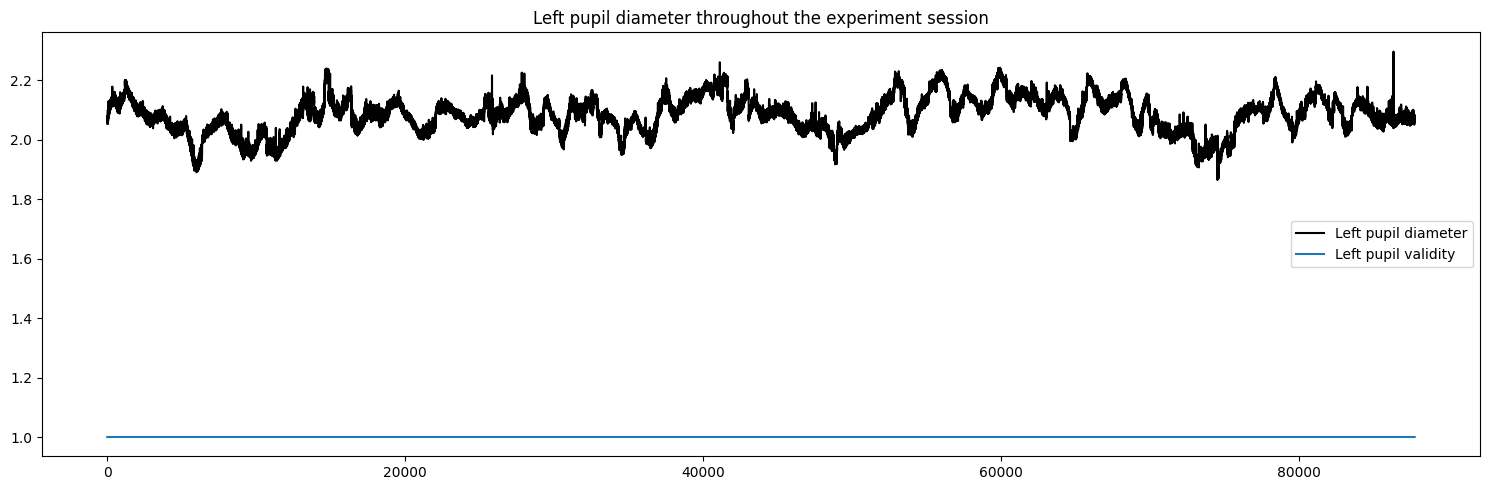

In [8]:
plot_pupil_dia(data_invalids_removed)

## Replacing invalid data
Use the function `replace_invalids_w_nans` from `extract_eye_features.utils` to replace all rows that do not contain pupil diameter. Invalid data will be replaced with `np.nan`.

This function ensures that the length of the data stays the same, while ensuring the removal of noisy data.

*Note: While not used for pupil diameter preprocessing, this may prove useful in other scenarios.*

In [9]:
# Import the function and print docstring
from extract_eye_features.utils import replace_invalids_w_nans
help(replace_invalids_w_nans)

Help on function replace_invalids_w_nans in module extract_eye_features.utils:

replace_invalids_w_nans(dataframe, threshold=1, pad_before=150, pad_after=150, verbose=True)
    Replaces continuous sequences of data where the pupil is invalid for at least `threshold` samples
    with NaN values, including the data before and after that sequence (size defined by padding).
    
    Args:
        - dataframe (pd.DataFrame):    The dataframe containing eye-tracking data.
        - threshold (int, optional):   Minimum number of continuous invalid rows to trigger NaN replacement. Defaults to 1 (aggressive replacement).
        - pad_before (int, optional):  Number of rows to replace with NaN before each invalid segment. Defaults to 150 (aggressive artifact padding).
        - pad_after (int, optional):   Number of rows to replace with NaN after each invalid segment. Defaults to 150 (aggressive artifact padding).
        - verbose (bool, optional):    Print details on how much data has been re

In [10]:
# Usage
data_invalids_replaced = replace_invalids_w_nans(data)

dataframe size: 104255
number of segments replaced with np.nan: 132
total number of rows replaced with np.nan: 16521


d:\GITHUB\eye-tracking-ccs\preprocessing and feature extraction\extract_eye_features\utils.py:116: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dataframe.iloc[replace_positions_sorted] = np.nan


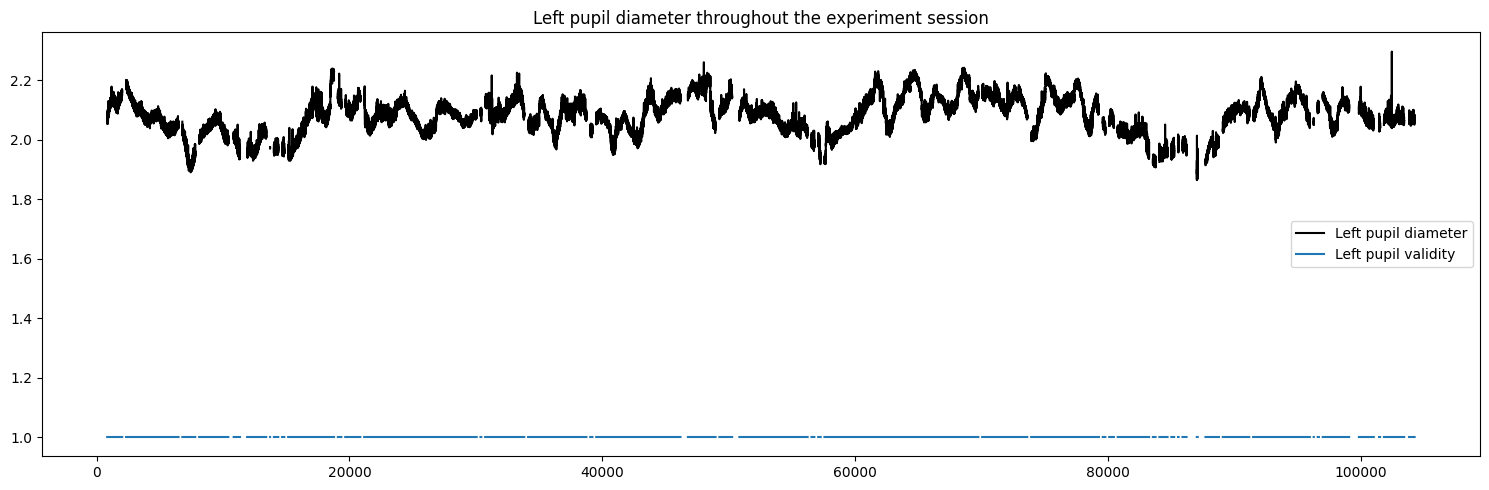

In [11]:
plot_pupil_dia(data_invalids_replaced)

## Applying smoothing to the pupil diameter signal
Use the function `apply_smoothing` from `extract_eye_features.pupildiameter` to smooth the pupil diameter signal.

In [12]:
# Import the function and print docstring
from extract_eye_features.pupildiameter import apply_smoothing
help(apply_smoothing)

Help on function apply_smoothing in module extract_eye_features.pupildiameter:

apply_smoothing(dataframe, window_length=101, polyorder=3, plot_fig=False)
    Applies smoothing to the pupil diameter to decrease random fluctuations.
    
    Args:
        - dataframe (pd.DataFrame): The dataframe containing eye-tracking data,
                                    ideally after invalid rows have been removed by the `remove_invalids` function.
        - window_length (int, optional): The size of moving window over which the polynomial is fitted. Argument is passed to Savitzky-Golay filter. Defaults to 101.
        - polyorder (int, optional):     The degree of polynomial used to approximate the data inside each window. Argument is passed to Savitzky-Golay filter. Defaults to 3.
        - plot_fig (bool, optional):     If True, plot figure which overlays the raw and smoothed signals. Defaults to False.
    
    Returns:
        - pd.DataFrame: Dataframe after applying smoothing to pupil diam

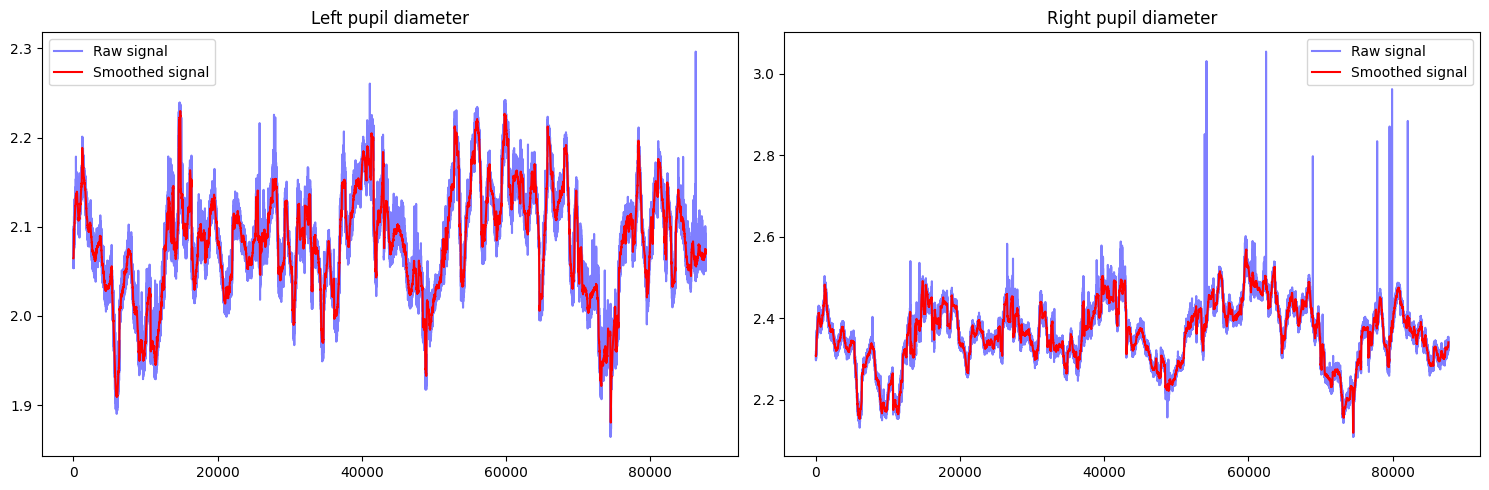

In [13]:
# Usage
# Note: Use the dataframe from which invalid and noisy data has been removed
data_invalids_removed_smoothed = apply_smoothing(data_invalids_removed, plot_fig=True)

# Performing baseline correction of pupil diameter
Use the function `baseline_correction` from `extract_eye_features.pupildiameter` to perform **subtractive baseline correction** of the pupil diameter signal.

The signal is corrected by subtracting the baseline (scrambled image) value from its corresponding stimulus period. <br>
The baseline value is calculated by taking the mean of a 500 ms period, towards the end of the scrambled image viewing period.

Each pupil is baseline corrected individually.

The dataframe returned by this function has two new columns, containing baseline-corrected pupil diameter values: <br>
`left_pupil_diameter_bc` and `left_pupil_diameter_bc`.

In [14]:
# Import the function and print docstring
from extract_eye_features.pupildiameter import baseline_correction
help(baseline_correction)

Help on function baseline_correction in module extract_eye_features.pupildiameter:

baseline_correction(dataframe)
    Performs subtractive baseline correction (per pupil, per trial) by taking the mean from a 500 ms baseline period (scrambled image).
    
    Args:
        - dataframe (pd.DataFrame): The dataframe containing eye-tracking data,
                             ideally after removing invalid rows using `remove_invalids`,
                             and smoothing the pupil diameter signal using `apply_smoothing`.
    
    Returns:
        - pd.DataFrame: Dataframe after performing baseline correction.
                                    This dataframe will contain two new columns: "left_pupil_diameter_bc" and "right_pupil_diameter_bc".



In [15]:
# Usage
# Note: Use the dataframe where invalids have been removed, and smoothing applied
data_baseline_corrected = baseline_correction(data_invalids_removed_smoothed)

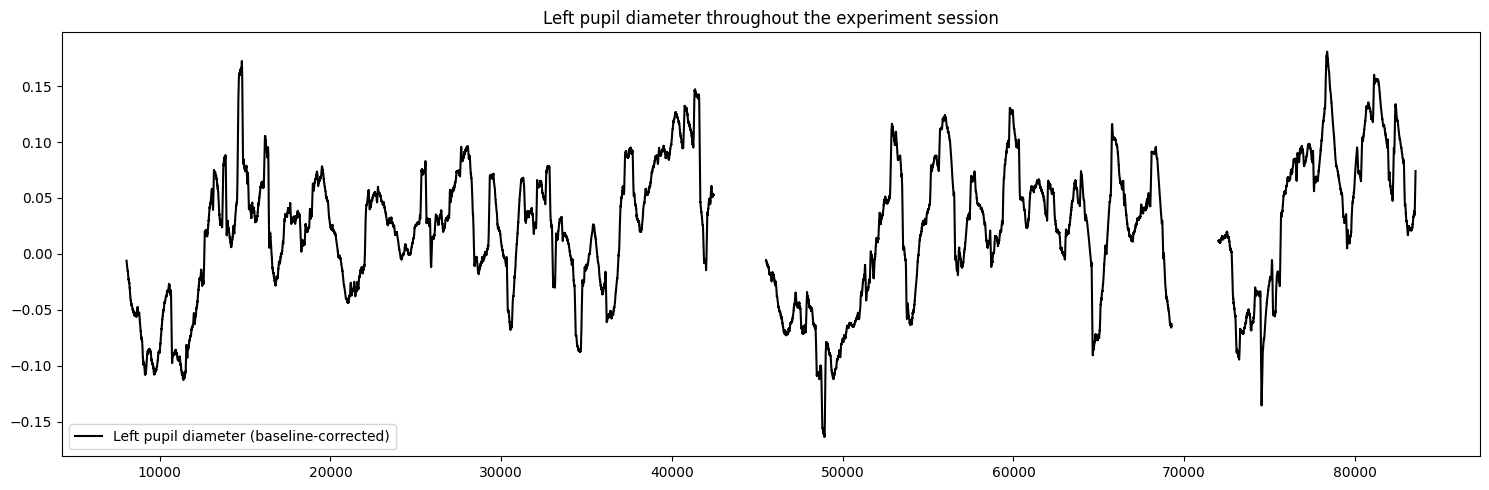

In [16]:
# Visualize to check
# (this time, plot the new columns obtained after running baseline correction: left|right_pupil_diameter_bc)
plt.figure(figsize=(15, 5))
plt.plot(data_baseline_corrected.left_pupil_diameter_bc, label='Left pupil diameter (baseline-corrected)', color='k')
plt.title('Left pupil diameter throughout the experiment session')
plt.legend()
plt.tight_layout()
plt.show()

In the plot above, the missing segments are those which were used as baseline (scrambled image). In this implementation, the baseline segments (where `df.remarks=="SCRAMBLED IMAGE"`) do not hold any baseline corrected pupil diameter value.

# Getting the pupil diameter
After preprocessing and baseline-correcting the pupil diameter signal, the mean and sd of the pupil diameter can be computed. This is study-specific, depending on which exact segment/task the metrics need to be computed for.

Shown below is a very general overview of the mean and sd for both absolute and baseline-corrected pupil diameters, computed for the entire recording session.

In [17]:
print("PUPIL DIAMETER (ABSOLUTE, AFTER SMOOTHING)")
print("Left mean:\t", data_baseline_corrected.left_pupil_diameter_smooth.mean())
print("Left std:\t", data_baseline_corrected.left_pupil_diameter_smooth.std())
print("Right mean:\t", data_baseline_corrected.right_pupil_diameter_smooth.mean())
print("Right std:\t", data_baseline_corrected.right_pupil_diameter_smooth.std())

print("\nPUPIL DIAMETER (BASELINE-CORRECTED)")
print("Left mean:\t", data_baseline_corrected.left_pupil_diameter_bc.mean())
print("Left std:\t", data_baseline_corrected.left_pupil_diameter_bc.std())
print("Right mean:\t", data_baseline_corrected.right_pupil_diameter_bc.mean())
print("Right std:\t", data_baseline_corrected.right_pupil_diameter_bc.std())

PUPIL DIAMETER (ABSOLUTE, AFTER SMOOTHING)
Left mean:	 2.0825622209927332
Left std:	 0.05937523845165567
Right mean:	 2.360876026492661
Right std:	 0.0771702158612099

PUPIL DIAMETER (BASELINE-CORRECTED)
Left mean:	 0.02154764645721382
Left std:	 0.06055984900476549
Right mean:	 0.04674679386097074
Right std:	 0.07913254045528262
